In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 2.5
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 479291.6875 
loc
 [[10.525788   11.54548   ]
 [ 2.6087904   1.8868625 ]
 [ 5.005557    2.6585505 ]
 [ 4.3373804  12.83849   ]
 [ 8.769936    3.1988308 ]
 [ 0.89083546  8.672187  ]
 [10.274224    2.512418  ]
 [ 9.348548    6.860104  ]
 [ 0.          0.        ]
 [ 0.          0.        ]] 




True count: 8
True total flux: 479291.6875

Starting the sampler...
iteration 5, temperature = 0.0007555714109912515, posterior mean count = 6.852203369140625
iteration 10, temperature = 0.0029916074126958847, posterior mean count = 7.357382774353027
iteration 15, temperature = 0.008029856719076633, posterior mean count = 7.580738067626953
iteration 20, temperature = 0.016790572553873062, posterior mean count = 7.6107988357543945
iteration 25, temperature = 0.030443541705608368, posterior mean count = 7.5964179039001465
iteration 30, temperature = 0.05624816566705704, posterior mean count = 7.617929458618164
iteration 35, temperature = 0.10848574340343475, posterior mean count = 7.6734089851379395
iteration 40, temperature = 0.19424989819526672, posterior mean count = 7.739075660705566
iteration 45, temperature = 0.31139230728149414, posterior mean count = 7.851785182952881
iteration 50, temperature = 0.4765031933784485, posterior mean count = 7.909951210021973
iteration 55, temperatur

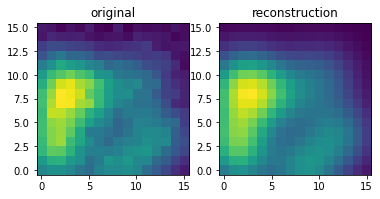

In [4]:
tile_side_length = img_dim//2

max_objects_smc = max_objects + 2
pad = 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, tile_side_length, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()